In [1]:
# Importing the required libraries
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the dataset into a pandas dataframe
data = pd.read_csv('E:\P288_Clustering_Project\P288_Group1_Clustering_Project_Excelr\Dataset\IQR.csv')

# Creating a DataFrame with the loaded data
df = pd.DataFrame(data)

# checking the dataframe
df

,CO2 Emissions,Days to Start Business,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,Infant Mortality Rate,Lending Interest,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Population 15-64,Population 65+,Population Total,Tourism Inbound,Tourism Outbound,Birth Rate,Internet Usage,Population 0-14,Population Urban
0,87931.0,26.000,26998.000,5.479006e+10,0.035,60.000,0.0340,0.1000,71.0,67.0,0.0,0.6190,0.039,3.171945e+07,1.020000e+08,1.930000e+08,0.020,0.0,0.3420,0.599
1,9542.0,26.000,7499.000,9.129595e+09,0.034,22.000,0.1075,0.2265,47.0,44.0,0.0,0.4990,0.025,1.392493e+07,3.400000e+07,1.460000e+08,0.050,0.0,0.4760,0.324
2,1617.0,26.000,1983.000,2.359122e+09,0.043,15.000,0.0900,0.1200,57.0,53.0,0.0,0.5170,0.029,6.949366e+06,7.700000e+07,5.000000e+07,0.043,0.0,0.4540,0.383
3,4276.0,26.000,1836.000,5.788312e+09,0.047,152.000,0.0540,0.1550,52.0,49.0,0.1,0.5870,0.029,1.755375e+06,2.270000e+08,2.090000e+08,0.027,0.0,0.3830,0.532
4,1041.0,26.000,14338.000,2.610959e+09,0.051,12.000,0.0960,0.1200,52.0,49.0,0.0,0.5050,0.028,1.160794e+07,2.300000e+07,3.000000e+07,0.046,0.0,0.4680,0.178
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2699,8529.0,26.000,14338.000,1.507975e+10,0.061,193.000,0.0200,0.1200,75.0,69.0,0.5,0.6425,0.052,3.242700e+04,6.885000e+08,4.560000e+08,0.020,0.1,0.2995,0.911
2700,8529.0,5.000,46913.625,2.213750e+11,0.118,1291.125,0.0060,0.0330,81.0,76.0,1.0,0.6670,0.136,4.903473e+07,6.341000e+09,4.058250e+09,0.013,0.8,0.1960,0.811
2701,8529.0,7.000,14338.000,5.000435e+10,0.089,1291.125,0.0100,0.1120,80.0,74.0,1.5,0.6390,0.140,3.395253e+06,2.222000e+09,1.028000e+09,0.015,0.5,0.2200,0.948
2702,8529.0,55.625,14338.000,2.213750e+11,0.046,593.000,0.0130,0.1640,78.0,72.0,1.0,0.6520,0.060,2.995478e+07,9.040000e+08,3.202000e+09,0.020,0.5,0.2880,0.889


In [20]:
df.columns

Index(['CO2 Emissions', 'Days to Start Business', 'Energy Usage', 'GDP',
       'Health Exp % GDP', 'Health Exp/Capita', 'Infant Mortality Rate',
       'Lending Interest', 'Life Expectancy Female', 'Life Expectancy Male',
       'Mobile Phone Usage', 'Population 15-64', 'Population 65+',
       'Population Total', 'Tourism Inbound', 'Tourism Outbound', 'Birth Rate',
       'Internet Usage', 'Population 0-14', 'Population Urban'],
      dtype='object')

In [3]:
# Assuming `data` is your original array-like dataset
df_normalized = np.sqrt(data)

In [4]:
# Function to check if a column is symmetric
def is_symmetric(column):
    skewness = column.skew()
    return abs(skewness) < 0.1

# Apply the function to each numeric column in the DataFrame
symmetry_check = df.select_dtypes(include=[np.number]).apply(is_symmetric)

print(symmetry_check)

CO2 Emissions             False
Days to Start Business    False
Energy Usage              False
GDP                       False
Health Exp % GDP          False
Health Exp/Capita         False
Infant Mortality Rate     False
Lending Interest          False
Life Expectancy Female    False
Life Expectancy Male      False
Mobile Phone Usage        False
Population 15-64          False
Population 65+            False
Population Total          False
Tourism Inbound           False
Tourism Outbound          False
Birth Rate                False
Internet Usage            False
Population 0-14            True
Population Urban           True
dtype: bool


In [5]:
# K-Means
kmeans = KMeans(n_clusters=3)
kmeans.fit(df_normalized)
labels_kmeans = kmeans.labels_
print("K-Means labels:")
print(labels_kmeans)

# Agglomerative Clustering
agg = AgglomerativeClustering(n_clusters=3)
labels_agg = agg.fit_predict(df_normalized)
print("\nAgglomerative Clustering labels:")
print(labels_agg)

# DBSCAN
dbscan = DBSCAN(eps=0.3)
labels_dbscan = dbscan.fit_predict(df_normalized)
print("\nDBSCAN labels:")
print(labels_dbscan)


K-Means labels:
[2 0 0 ... 2 1 0]

Agglomerative Clustering labels:
[1 0 0 ... 1 2 0]

DBSCAN labels:
[-1 -1 -1 ... -1 -1 -1]


In [6]:
fig = go.Figure(data=go.Scatter3d(
    x=df_normalized.iloc[:, 0],  # assuming the DataFrame has at least three columns
    y=df_normalized.iloc[:, 1],
    z=df_normalized.iloc[:, 2],
    mode='markers',
    marker=dict(
        size=5,
        color=labels_kmeans,  # set color to the K-Means cluster labels
        colorscale='Viridis',  # choose a colorscale
        opacity=0.8
    )
))

fig.show()


In [7]:
fig = go.Figure(data=go.Scatter3d(
    x=df_normalized.iloc[:, 0],
    y=df_normalized.iloc[:, 1],
    z=df_normalized.iloc[:, 2],
    mode='markers',
    marker=dict(
        size=5,
        color=labels_agg,  # set color to the Agglomerative Clustering labels
        colorscale='Viridis',
        opacity=0.8
    )
))

fig.show()


In [8]:
fig = go.Figure(data=go.Scatter3d(
    x=df_normalized.iloc[:, 0],
    y=df_normalized.iloc[:, 1],
    z=df_normalized.iloc[:, 2],
    mode='markers',
    marker=dict(
        size=5,
        color=labels_dbscan,  # set color to the DBSCAN labels
        colorscale='Viridis',
        opacity=0.8
    )
))

fig.show()


In [9]:
from sklearn.cluster import KMeans
import plotly.graph_objects as go

sse = []
list_k = list(range(1, 10))

for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(df_normalized)
    sse.append(km.inertia_)

fig = go.Figure(data=go.Scatter(x=list_k, y=sse, mode='lines+markers'))
fig.update_layout(title='Elbow Method', xaxis_title='Number of clusters k', yaxis_title='Sum of squared distance')
fig.show()


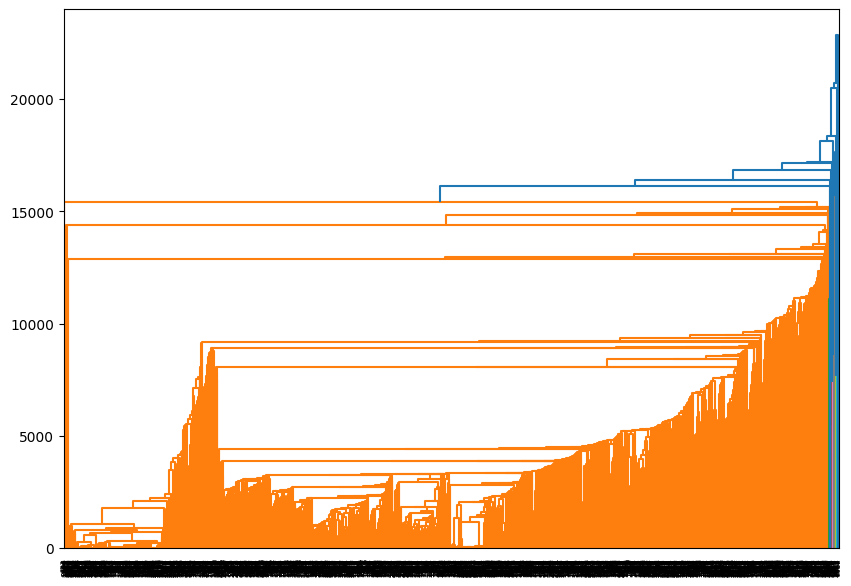

In [10]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

linked = linkage(df_normalized, 'single')

plt.figure(figsize=(10, 7))
dendrogram(linked,
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=True)
plt.show()


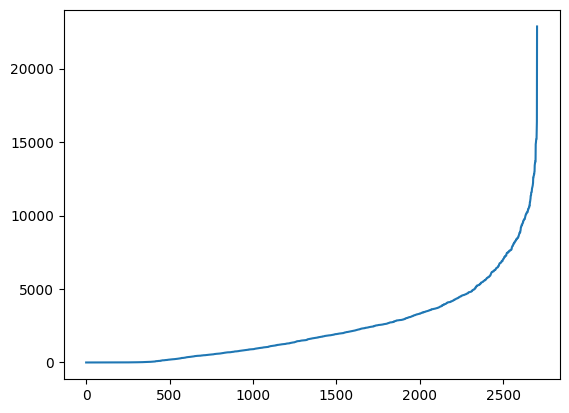

In [11]:
from sklearn.neighbors import NearestNeighbors
import numpy as np

neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(df_normalized)
distances, indices = nbrs.kneighbors(df_normalized)

distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)


In [12]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn import metrics

# Assuming 'df_normalized' is your DataFrame

# K-Means
kmeans = KMeans(n_clusters=3)
labels_kmeans = kmeans.fit_predict(df_normalized)

# Agglomerative Clustering
agg = AgglomerativeClustering(n_clusters=3)
labels_agg = agg.fit_predict(df_normalized)

# DBSCAN
dbscan = DBSCAN(eps=0.3)
labels_dbscan = dbscan.fit_predict(df_normalized)

# Calculate metrics
for name, labels in zip(['K-Means', 'Agglomerative', 'DBSCAN'], [labels_kmeans, labels_agg, labels_dbscan]):
    print(f"\n{name}:")
    print(f"Silhouette Score: {metrics.silhouette_score(df_normalized, labels)}")
    print(f"Calinski-Harabasz Index: {metrics.calinski_harabasz_score(df_normalized, labels)}")
    print(f"Davies-Bouldin Index: {metrics.davies_bouldin_score(df_normalized, labels)}")



K-Means:
Silhouette Score: 0.6378161564618656
Calinski-Harabasz Index: 15160.635155324613
Davies-Bouldin Index: 0.5301158446992953

Agglomerative:
Silhouette Score: 0.657742204384634
Calinski-Harabasz Index: 14334.219873148091
Davies-Bouldin Index: 0.5142035923598317

DBSCAN:
Silhouette Score: -0.6152871547593055
Calinski-Harabasz Index: 29.40407865175737
Davies-Bouldin Index: 1.0123464306140635


In [13]:
from sklearn.mixture import GaussianMixture

# Assuming `df` is your DataFrame
gmm = GaussianMixture(n_components=3)
gmm.fit(df_normalized)

# Predict the cluster for each data point
labels_gmm = gmm.predict(df_normalized)


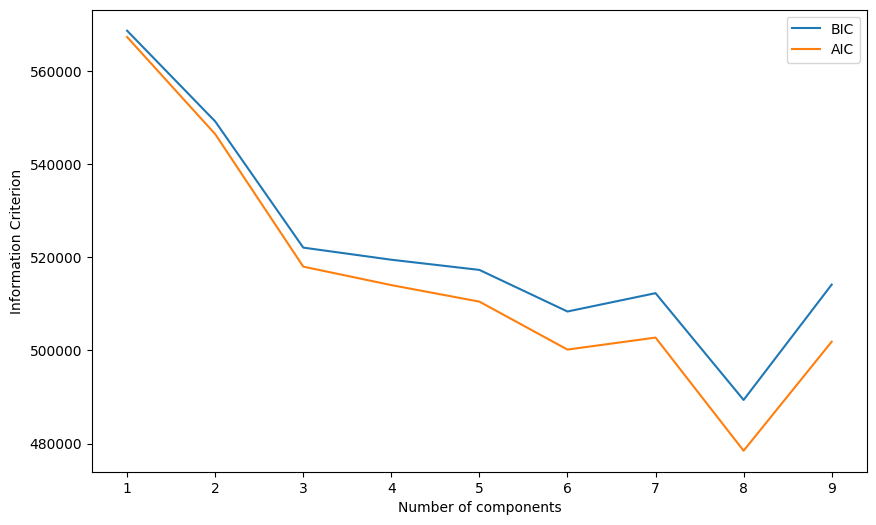

In [14]:
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture

# Assuming `df` is your DataFrame
n_components = range(1, 10)  # Adjust range as needed
bics = []
aics = []

for n in n_components:
    gmm = GaussianMixture(n_components=n)
    gmm.fit(df)
    bics.append(gmm.bic(df))
    aics.append(gmm.aic(df))

plt.figure(figsize=(10, 6))
plt.plot(n_components, bics, label='BIC')
plt.plot(n_components, aics, label='AIC')
plt.xlabel('Number of components')
plt.ylabel('Information Criterion')
plt.legend()
plt.show()


In [18]:
from sklearn.mixture import GaussianMixture

# Assuming `df` is your DataFrame
gmm = GaussianMixture(n_components=8)
gmm.fit(df_normalized)

# Predict the cluster for each data point
labels_gmm = gmm.predict(df_normalized)


In [19]:
from sklearn import metrics

# Assuming `labels_gmm` are the labels predicted by your GMM
print(f"Silhouette Score: {metrics.silhouette_score(df, labels_gmm)}")
print(f"Calinski-Harabasz Index: {metrics.calinski_harabasz_score(df, labels_gmm)}")
print(f"Davies-Bouldin Index: {metrics.davies_bouldin_score(df, labels_gmm)}")


Silhouette Score: 0.16191848785005794
Calinski-Harabasz Index: 5376.368029614628
Davies-Bouldin Index: 1.4846311876215532


In [17]:
wss=[]
for i in range(2,6):
  k_means=KMeans(n_clusters=i,init='random',n_init='auto',algorithm='lloyd')
  k_means.fit(df_normalized)
  wss.append(k_means.inertia_)
  print(metrics.silhouette_score(df_normalized,k_means.labels_))

0.7527538832604252
0.6376133571726594
0.5879534315444852
0.581310994286265


In [26]:
met={'euclidean', 'yule', 'braycurtis', 'dice', 'chebyshev',
       'jaccard', 'canberra', 'russellrao', 'l2',
      'manhattan', 'rogerstanimoto',
     'cityblock', 'l1', 'haversine', 'sqeuclidean', 'hamming', 'cosine',
     'sokalsneath', 'sokalmichener'}
score=0
for met in met:
  hc=AgglomerativeClustering(n_clusters=2,metric=met,linkage='single')
  y_hc=hc.fit_predict(df_normalized)
  y=metrics.silhouette_score(df_normalized,y_hc)
  if(score<y):
    score=y
    print("for {} metrics ".format(met)+" "+"sil score is {} ".format(metrics.silhouette_score(df_normalized,y_hc)))

In [27]:
linkage = [ 'complete', 'average', 'single']
met=['euclidean','canberra','braycurtis','chebyshev','manhattan']
score=0
for met in met:
  for link in linkage:
    hc=AgglomerativeClustering(n_clusters=3,metric=met,linkage=link)
    y_hc=hc.fit_predict(df_normalized)
    y=metrics.silhouette_score(df_normalized,y_hc)
    if(score<y):
     score=y
     print(link)
     print("for {} metrics ".format(met)+" "+"sil score is {} ".format(metrics.silhouette_score(df_normalized,y_hc)))

complete
for euclidean metrics  sil score is 0.5253971900380692 
average
for euclidean metrics  sil score is 0.66495568115347 
average
for chebyshev metrics  sil score is 0.6696913074923421 


In [28]:
score=0
for clus in range(2,10):
  hc=AgglomerativeClustering(n_clusters=clus,metric='chebyshev',linkage='average')
  y_hc=hc.fit_predict(df_normalized)
  y=metrics.silhouette_score(df_normalized,y_hc)
  if(score<y):
    score=y
  print("for {} cluster ".format(clus)+" "+"sil score is {} ".format(metrics.silhouette_score(df_normalized,y_hc)))

for 2 cluster  sil score is 0.7026797055591117 
for 3 cluster  sil score is 0.6696913074923421 
for 4 cluster  sil score is 0.596539135991085 
for 5 cluster  sil score is 0.5768312023192417 
for 6 cluster  sil score is 0.5504213027086101 
for 7 cluster  sil score is 0.5361130578720593 
for 8 cluster  sil score is 0.5045032018540614 
for 9 cluster  sil score is 0.4947112344005011 


In [24]:
epsl=[0.3,0.4,0.5,0.8,0.9]
score=0
for ep in epsl:
  for sample in range(2,12):
    dbscan=DBSCAN(eps=ep,min_samples=sample)
    dbscan.fit(df_normalized)
    if(score < metrics.silhouette_score(df_normalized,dbscan.labels_)):
      score=metrics.silhouette_score(df_normalized,dbscan.labels_)
      print(str("for eps {} ".format(ep))+str("and  min_sample {} ".format(sample))+" silhouette score is {}" .format(metrics.silhouette_score(df_normalized,dbscan.labels_)))

for eps 0.3 and  min_sample 6  silhouette score is 0.27984017837768294
for eps 0.4 and  min_sample 7  silhouette score is 0.29033682988809295
for eps 0.5 and  min_sample 7  silhouette score is 0.29604838455789384
for eps 0.8 and  min_sample 8  silhouette score is 0.30523482409467695
for eps 0.9 and  min_sample 8  silhouette score is 0.30794340907426404


In [29]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn import metrics

# Assuming 'df_normalized' is your DataFrame

# K-Means
kmeans = KMeans(n_clusters=2)
labels_kmeans = kmeans.fit_predict(df_normalized)

# Agglomerative Clustering
agg = AgglomerativeClustering(n_clusters=2)
labels_agg = agg.fit_predict(df_normalized)

# DBSCAN
dbscan = DBSCAN(eps=0.9)
labels_dbscan = dbscan.fit_predict(df_normalized)

# Calculate metrics
for name, labels in zip(['K-Means', 'Agglomerative', 'DBSCAN'], [labels_kmeans, labels_agg, labels_dbscan]):
    print(f"\n{name}:")
    print(f"Silhouette Score: {metrics.silhouette_score(df_normalized, labels)}")
    print(f"Calinski-Harabasz Index: {metrics.calinski_harabasz_score(df_normalized, labels)}")
    print(f"Davies-Bouldin Index: {metrics.davies_bouldin_score(df_normalized, labels)}")



K-Means:
Silhouette Score: 0.7527538832604252
Calinski-Harabasz Index: 13940.589722777166
Davies-Bouldin Index: 0.3458416130198806

Agglomerative:
Silhouette Score: 0.6698981971775968
Calinski-Harabasz Index: 8814.990665890064
Davies-Bouldin Index: 0.49953832852127467

DBSCAN:
Silhouette Score: -0.576612190898979
Calinski-Harabasz Index: 79.66854942791124
Davies-Bouldin Index: 1.1962458897779922
